In [162]:
#For data Manipulation
import numpy as np
import pandas as pd
#In order to show all columns available
pd.set_option('display.max_columns', 200)

#Sklearn imports
from sklearn.preprocessing import LabelEncoder

#file system management
import os

#Graphing libs
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
#listing directory, viewing files available
print(os.listdir("./Dataset"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


# Exploratory Data Analysis

In order to find out what our data can tell us, we should explore the features and dimensions of our data. The main source of data for our dataset here will be located in the 'application_train.csv' file. So we load the data into pandas in order to organize and see our fields

In [164]:
#Create dataframe called apptrain (for applicant train)
apptrain = pd.read_csv('./Dataset/application_train.csv')
apptest = pd.read_csv('./Dataset/application_test.csv')
apptrain.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [165]:
print(apptest.shape)
apptest

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.1250,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Marr

# Find missing data
First things first, let's go through our data and find out if there are columns missing data, and find out how to clean them. This is also helpful in finding out which features will have not a lot of weight in helping our model learn.

In [166]:
# missing value check
def check_missing_value(df):
    # Returns how many values are missing in each column
    missing_values = df.isnull().sum()
    # Percentage
    missing_values_percent = 100 * missing_values / len(df)
    # Table
    missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
    # renaming columns
    missing_value_table_renamed_columns = missing_values_table.rename( columns={0: 'Missing values', 1: '% of total values'})
    # return summary info
    return missing_value_table_renamed_columns

In [167]:
# Using previously defined function to create a new df to inspect columns

expl_missing_values_df = check_missing_value(apptrain)

In [168]:
# Creating a new dataframe called mvdf that shows the amount of missing values and the percentage.

mvdf = expl_missing_values_df.loc[~(expl_missing_values_df==0).all(axis=1)]
mvdf.sort_values(by=['% of total values'], ascending=False).head(30)

,Missing values,% of total values
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


# Let's hit the Target column
Considering that we're giving the outcome in our training data but not our test data, let's see what the distribution looks like. Here we will put up a simple matplotlib graph to show the distribution of those who demonstrate high ability and those who don't

In [169]:
# count the number of 1's and 0's within the target column

apptrain['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

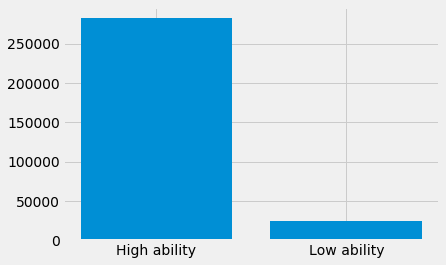

In [170]:
# Visual representation of 
fig, ax = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain['TARGET'].value_counts()[0], apptrain['TARGET'].value_counts()[1]])
plt.xticks(x, ('High ability', 'Low ability'))
plt.show()

# Number of Unique categories in categorical features
To find out how many unique entries there are in the categorical columns we can use the following line of code. This is helpful for one-hot encoding should we choose this feature

In [171]:
apptrain.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# One-Hot Encoding, Label-Encoding, and PCA (Principal Component Analysis)
For now, we will use label-encoding for categorical columns which ontain only two distinct values (binary). and we will use one-hot enoding for all other columns. One-hot encoding will be one hell of an explosion for the column ORGANIZATION TYPE, due to the large amount of distinct variables

In [172]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through columns
for col in apptrain:
    if apptrain[col].dtype == "object":
        if len(list(apptrain[col].unique())) <= 2:
            #train on the training data
            le.fit(apptrain[col])
            #transform both training and testing data
            apptrain[col] = le.transform(apptrain[col])
            apptest[col] = le.transform(apptest[col])
            
            le_count += 1
            

print('{} columns were label encoded'.format(le_count))

3 columns were label encoded


In [173]:
#One-Hot encoding
apptrain = pd.get_dummies(apptrain)
apptest = pd.get_dummies(apptest)

print('Training features shape: {}'.format(apptrain.shape))
print('Training features shape: {}'.format(apptest.shape))

Training features shape: (307511, 243)
Training features shape: (48744, 239)


In [174]:
train_labels = apptrain['TARGET']

#aligning the training and testing data, keep only columns present in both df's
apptrain, apptest = apptrain.align(apptest, join = 'inner', axis = 1)
apptrain['TARGET'] = train_labels

print('Training Features shape: ', apptrain.shape)
print('Testing features shape: ', apptest.shape)

Training Features shape:  (307511, 240)
Testing features shape:  (48744, 239)


In [175]:
(apptrain['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [176]:
apptrain['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

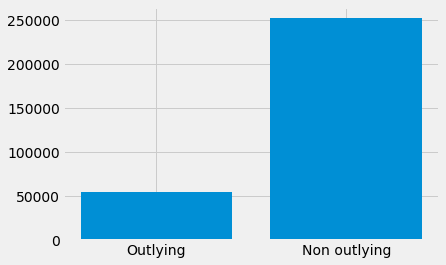

In [177]:
# Seems as if our data has an error, Some people have been employed for 100+ years,
fig1, ax1 = plt.subplots()
x = np.arange(2)
plt.bar(x, [apptrain[apptrain['DAYS_EMPLOYED'] == 365243].count()[0], apptrain[apptrain['DAYS_EMPLOYED'] != 365243].count()[0] ])
plt.xticks(x, ['Outlying', 'Non outlying'])
plt.show()

In [178]:
#So we know we have approximately 5000 entries with anomalous data 

In [179]:
de_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] == 365243]
de_non_anomalous = apptrain[apptrain['DAYS_EMPLOYED'] != 365243]

print('Non-anomalous dataset defaults on {}%'.format(100*de_non_anomalous['TARGET'].mean()))
print('Anomalous dataset defaults on {}%'.format(100*de_anomalous['TARGET'].mean()))

Non-anomalous dataset defaults on 8.65997453765215%
Anomalous dataset defaults on 5.399646043269405%


Text(0.5,0,'Days Employment')

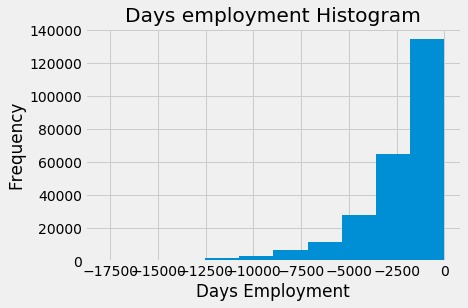

In [180]:
apptrain['DAYS_EMPLOYED_ANOM'] = apptrain['DAYS_EMPLOYED'] == 365243
apptrain['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
apptrain['DAYS_EMPLOYED'].plot.hist(title="Days employment Histogram")
plt.xlabel('Days Employment')

In [181]:
# Very important to migrate changes over to our test data as well.
apptest['DAYS_EMPLOYED_ANOM'] = apptest['DAYS_EMPLOYED'] == 365243
apptest['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
print('There are {} anomalies in the test data out of {} entries'.format(apptest['DAYS_EMPLOYED_ANOM'].sum(), len(apptest)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlations
It's time to explore correlations between our many features and the target (what we're aiming to predict)

In [182]:
correlations = apptrain.corr()['TARGET'].sort_values()
print('Top 15 positive correlations', correlations.tail(15))
print('Top 15 negative correlations', correlations.head(15))

Top 15 positive correlations OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Top 15 negat

In [183]:
apptrain['DAYS_BIRTH'] = abs(apptrain['DAYS_BIRTH'])
apptrain['DAYS_BIRTH'].corr(apptrain['TARGET'])

-0.07823930830982712

Text(0,0.5,'Count')

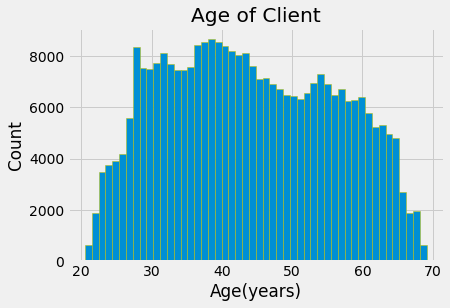

In [184]:
plt.style.use('fivethirtyeight')
plt.hist(apptrain['DAYS_BIRTH']/365, bins=50, edgecolor='y')
plt.title('Age of Client')
plt.xlabel('Age(years)')
plt.ylabel('Count')

Text(0.5,1,'Distribution of ages')

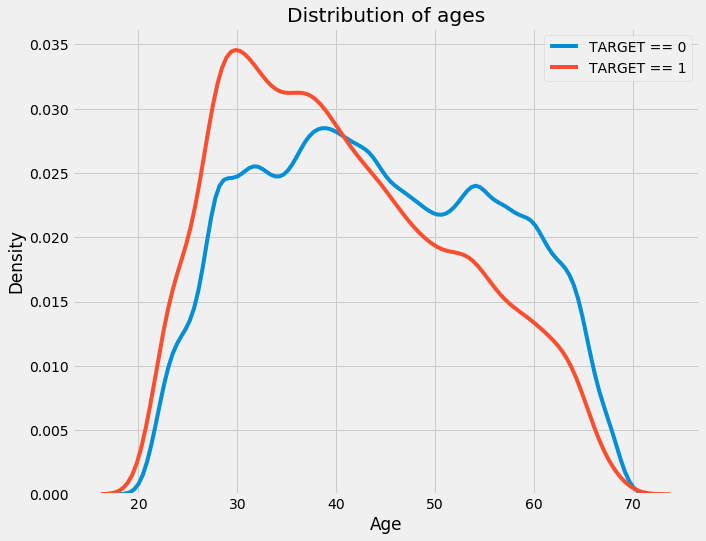

In [185]:
plt.figure(figsize = (10, 8))
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'TARGET == 0')
sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 1, 'DAYS_BIRTH'] / 365, LABEL = 'TARGET == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of ages')

In [186]:
age_df = apptrain[['TARGET', 'DAYS_BIRTH']]
age_df['YEARS_BIRTH'] = age_df['DAYS_BIRTH'] / 365

age_df['YEARS_BINNED'] = pd.cut(age_df['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_df.head(15)

C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [187]:
age_groups = age_df.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to repay by binned age')

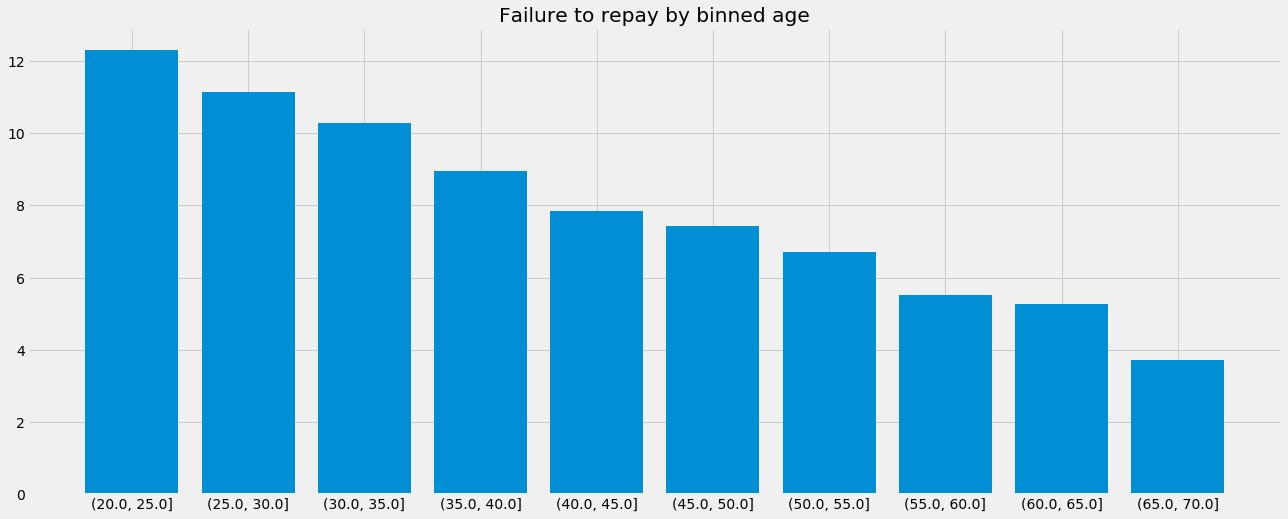

In [188]:
plt.figure(figsize = ( 20, 8))

plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.title('Failure to repay by binned age')

In [189]:
#Looking deeper at the correlations with EXT data sources

In [190]:
external_data = apptrain[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
external_data_correlation = external_data.corr()
external_data_correlation

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heatmap')

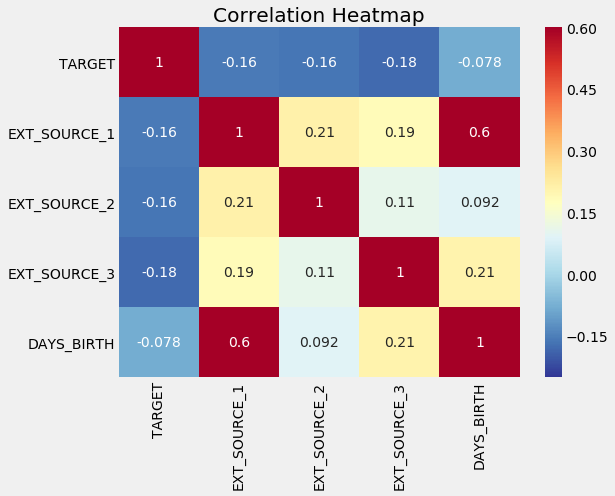

In [191]:
# Deploy correlation heatmap for easier view of tabular data
plt.figure(figsize = (8, 6))
sns.heatmap(external_data_correlation, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

C:\Users\rGust\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\rGust\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


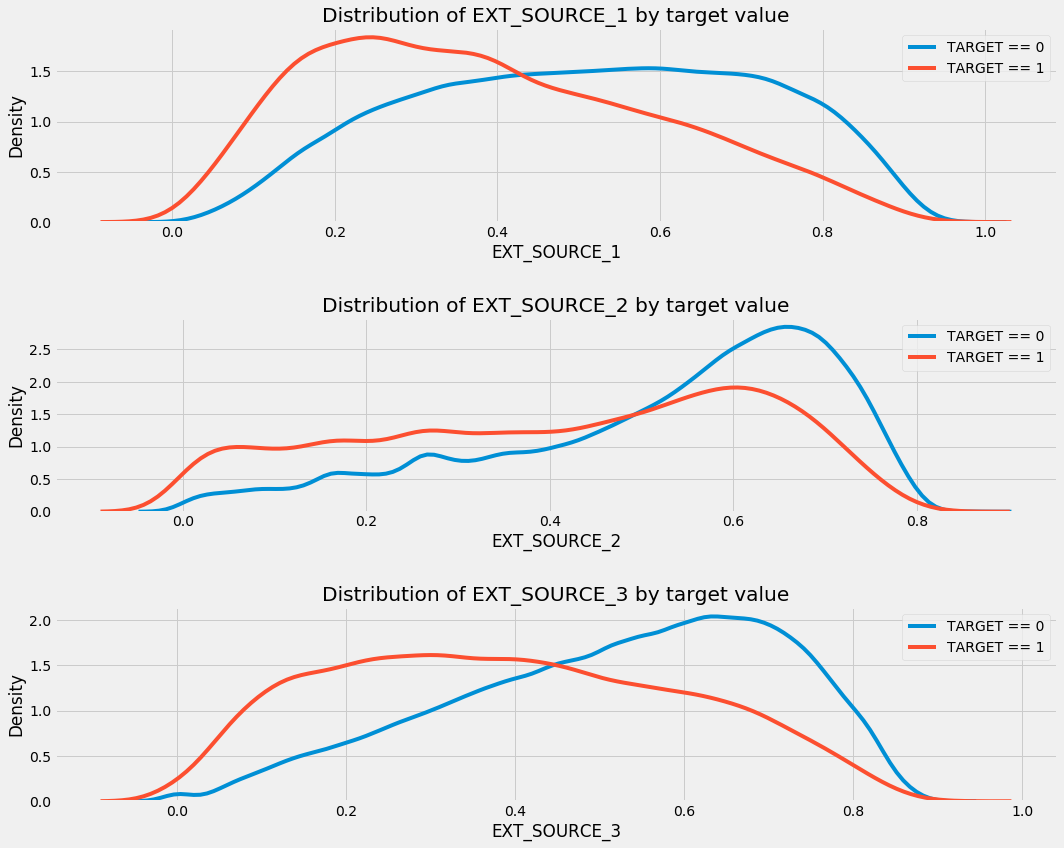

In [192]:
plt.figure(figsize = (15,12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 0, source], label = 'TARGET == 0')
    sns.kdeplot(apptrain.loc[apptrain['TARGET'] == 1, source], label = 'TARGET == 1')
    
    plt.title('Distribution of {} by target value'.format(source))
    plt.xlabel('{}'.format(source))
    plt.ylabel('Density')

plt.tight_layout(h_pad = 2.5)

In [193]:
#Creating polynomial features
poly_features = apptrain[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = apptest[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [194]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

#Imputing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
#Create polynomial object with specific degree
poly_transformer = PolynomialFeatures(degree = 3)

In [195]:
#train the polynomial features
poly_transformer.fit(poly_features)

#transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial features shape: ', poly_features.shape)

Polynomial features shape:  (307511, 35)


In [196]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [197]:
# Create a dataframe with the newly created features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add back the target
poly_features['TARGET'] = poly_target

#run correlations for new features
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [198]:
#Create a dataframe with newly created features for test
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [199]:
#Putting features into training dataframe
poly_features['SK_ID_CURR'] = apptrain['SK_ID_CURR']
apptrain_poly = apptrain.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

#Merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = apptest['SK_ID_CURR']
apptest_poly = apptest.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

#align DFs
apptrain_poly, apptest_poly = apptrain_poly.align(apptest_poly, join = 'inner', axis = 1)
print('training data with polynomial features shape: ', apptrain_poly.shape)
print('testing data with polynomial features shape: ', apptest_poly.shape)

training data with polynomial features shape:  (307511, 275)
testing data with polynomial features shape:  (48744, 275)


# Domain Knowledge

This is man-made feature engineering based on knowledge of the field. (For this particular dataset, that would be a knowledge in loans, banking, credit, etc)

In [200]:
apptrain_domain = apptrain.copy()
apptest_domain = apptest.copy()

apptrain_domain['CREDIT_INCOME_PERCENT'] = apptrain_domain['AMT_CREDIT'] * 100 / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['ANNUITY_INCOME_PERCENT'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_INCOME_TOTAL']
apptrain_domain['CREDIT_TERM'] = apptrain_domain['AMT_ANNUITY'] / apptrain_domain['AMT_CREDIT']
apptrain_domain['DAYS_EMPLOYED_PERCENT'] = apptrain_domain['DAYS_EMPLOYED'] / apptrain_domain['DAYS_BIRTH']

In [201]:
apptest_domain['CREDIT_INCOME_PERCENT'] = apptest_domain['AMT_CREDIT'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['ANNUITY_INCOME_PERCENT'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_INCOME_TOTAL']
apptest_domain['CREDIT_TERM'] = apptest_domain['AMT_ANNUITY'] / apptest_domain['AMT_CREDIT']
apptest_domain['DAYS_EMPLOYED_PERCENT'] = apptest_domain['DAYS_EMPLOYED'] / apptest_domain['DAYS_BIRTH']

In [202]:
apptrain_domain[['CREDIT_INCOME_PERCENT', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'TARGET', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']].head()

,CREDIT_INCOME_PERCENT,AMT_CREDIT,AMT_INCOME_TOTAL,TARGET,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,200.788889,406597.5,202500.0,1,0.121978,0.060749,-0.067329
1,479.075000,1293502.5,270000.0,0,0.132217,0.027598,-0.070862
2,200.000000,135000.0,67500.0,0,0.100000,0.050000,-0.011814
3,231.616667,312682.5,135000.0,0,0.219900,0.094941,-0.159905
4,422.222222,513000.0,121500.0,0,0.179963,0.042623,-0.152418


# Using Logistic Regression

Here we implement logistic regression on the dataset we've made in order to get predictions

In [203]:
from sklearn.preprocessing import MinMaxScaler, Imputer

if 'TARGET' in apptrain:
    train = apptrain.drop(columns = ['TARGET'])
else:
    train = apptrain.copy()


features = list(train.columns)

#copy test data
test = apptest.copy()

#median imputing of missing values
imputer = Imputer(strategy = 'median')

#scale each feature
scaler = MinMaxScaler(feature_range = (0,1))

#fitting on training data
imputer.fit(train)

#Transforming training and testing data
train = imputer.transform(train)
test = imputer.transform(apptest)

#Do so with scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data sape: ', train.shape)
print('testing data shape: ', test.shape)

Training data sape:  (307511, 240)
testing data shape:  (48744, 240)


In [204]:
from sklearn.linear_model import LogisticRegression

#Make model with regularization parameters
log_reg = LogisticRegression(C=0.0001)

#Train on training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [205]:
# log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [206]:
# submit = apptest[['SK_ID_CURR']]
# submit['TARGET'] = log_reg_pred


In [207]:
# # log_reg.score(train, apptrain['TARGET'])
# completedf = apptest[['SK_ID_CURR']]
# completedf['PROB_PAYBACK_TRUE'] = log_reg.predict_proba(test)[:, 0]
# completedf['PROB_PAYBACK_FALSE'] = log_reg.predict_proba(test)[:, 1]

# completedf[completedf['PROB_PAYBACK_TRUE' < .3]]

In [208]:
# submit.to_csv('log_reg_untuned.csv', index = False)
# Save to CSV and submit to kaggle competition

# Using the Random forest Classifier

The Random Forest Classifier is simply an amped up version of the decision tree. This powerful algorithm may provide better results based on the features we selected.

In [209]:
# Let's right a function that allows us to plot feature importances
def plot_feature_importances(df):
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['importance_normalized'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['feature'].head(30))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [210]:
from sklearn.ensemble import RandomForestClassifier

rndm_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1, max_features = 'auto')
# Explain parameters here
rndm_forest.fit(train, train_labels)

feature_importance_values = rndm_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

predictions = rndm_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.6s finished


In [211]:
# submitrf = apptest[['SK_ID_CURR']]
# submitrf['TARGET'] = predictions
# submitrf
# submitrf.to_csv('rndm_forest_500_estimators_mfauto.csv', index = False)

## Random Forest Feature Importance

With the Random Forest classifier, we can see which features the algorithm deemed important by using the feature_importance_ function. this will help us fine tune our feature engineering in order to gain better results by taking out noise.

In [212]:
feature_importances.head(15)
feature_importances.tail(15)

,feature,importance
225,FONDKAPREMONT_MODE_reg oper account,0.001286
226,FONDKAPREMONT_MODE_reg oper spec account,0.000778
227,HOUSETYPE_MODE_block of flats,0.001467
228,HOUSETYPE_MODE_specific housing,0.000401
229,HOUSETYPE_MODE_terraced house,0.000222
230,WALLSMATERIAL_MODE_Block,0.000778
231,WALLSMATERIAL_MODE_Mixed,0.000465
232,WALLSMATERIAL_MODE_Monolithic,0.000169
233,WALLSMATERIAL_MODE_Others,0.000429
234,WALLSMATERIAL_MODE_Panel,0.001381


## Random Forest Domain Knowledge feature importance of man-made features

We can use the random forest feature importance to see if our man made variables are helpful. If you recall, we've created a dataframe from apptrain called apptrain_domain in which we've inserted 5 features made by us by manipulating other variables. We'll use our tuned random forest and see where the feature importances lie.

In [257]:
# Prep data by taking target column out of training set, it is already stored.
prepped_apptrain_domain = apptrain_domain.drop(columns = 'TARGET')
prepped_apptrain_domain_features_name = list(prepped_apptrain_domain.columns)

# We make sure that all nan slots are filled with the imputing median strategy in order for our scales to work
domain_features = imputer.fit_transform(prepped_apptrain_domain)
domain_features_test = imputer.transform(apptest_domain)

# Now we scale our variables from 0, 1
scaler = MinMaxScaler(feature_range=(0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

rndom_forest_wdomain = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1, max_features = 'auto', max_depth = 4)

In [258]:
# Train the random forest model
rndom_forest_wdomain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = rndom_forest_wdomain.feature_importances_
feature_importances_wdomain = pd.DataFrame({'feature': prepped_apptrain_domain_features_name, 'importance': feature_importance_values_domain})

feature_importances_wdomain.sort_values(by = ['importance'], ascending = False).head(15)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.5s finished


,feature,importance
33,EXT_SOURCE_3,0.188217
32,EXT_SOURCE_2,0.163330
31,EXT_SOURCE_1,0.071295
11,DAYS_EMPLOYED,0.061413
10,DAYS_BIRTH,0.048086
243,DAYS_EMPLOYED_PERCENT,0.044652
125,NAME_EDUCATION_TYPE_Higher education,0.028345
242,CREDIT_TERM,0.026405
81,DAYS_LAST_PHONE_CHANGE,0.024271
8,AMT_GOODS_PRICE,0.022554


In [259]:
predictions = rndom_forest_wdomain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


In [260]:
# Make dataframe containing the models predictions
rf_domain_submit = apptest[['SK_ID_CURR']]
rf_domain_submit['TARGET'] = predictions

#Save it as a file
rf_domain_submit.to_csv('rndm_forest_with_domain_features2.csv', index = False)

C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Random forest with polynomial features

Now that we've tested our domain knowledge features, we should try and see if our polynomial features have a positive impact on performane of our model as well.

In [253]:
# Prep dataset for imputing, scaling, and fitting
trainpoly = apptrain_poly.copy()
testpoly = apptest_poly.copy()

# Imputing strategy
imputer = Imputer(strategy = 'median')

#scaling
scaler = MinMaxScaler(feature_range=(0,1))

#scaling/imputing features
imputer.fit(trainpoly)
trainpoly = imputer.transform(trainpoly)
testpoly = imputer.transform(testpoly)

scaler.fit(trainpoly)
trainpoly = scaler.transform(trainpoly)
testpoly = scaler.transform(testpoly)

trainpoly

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.65615892e-03, 2.30770153e-02, 2.72943738e-02],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.52381267e-01, 2.78935807e-01, 2.74456776e-01],
       [5.61398781e-06, 1.00000000e+00, 1.00000000e+00, ...,
        5.32637189e-01, 4.90716594e-01, 4.14937545e-01],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        3.76644294e-02, 9.08464884e-02, 1.87493575e-01],
       [9.99997193e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.74599008e-01, 1.75314431e-01, 8.25655819e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.14938704e-02, 5.99663235e-02, 2.79390053e-01]])

In [ ]:
# Developing the model
poly_random_forest = RandomForestClassifier(n_estimators=500, random_state=50, verbose=1, n_jobs=-1, max_features='auto')

#fit the data
# poly_random_forest.fit(trainpoly, train_labels)

#Extracting importances
polyfeature_importances = poly_random_forest.feature_importances_

In [ ]:
polyfeature_importances_df = pd.DataFrame({'features': list(apptrain_poly), 'importance': polyfeature_importances})
polyfeature_importances_df.sort_values(by=['importance'], ascending=False).head(35)

In [219]:
# poly_predictions = poly_random_forest.predict_proba(testpoly)[:, 1]

# poly_rf_submit = apptest[['SK_ID_CURR']]
# poly_rf_submit['TARGET'] = poly_predictions

#saving itm
# poly_rf_submit.to_csv('polyfeatures_randomforest.csv', index=False)

# Model based feature selection

Let us reduce dimensionality on our model to try and improve our score

In [220]:
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(rndom_forest_wdomain, threshold='median')
select.fit(domain_features, train_labels)

domain_features_filtered = select.transform(domain_features)
print('shape of original: {}'.format(domain_features.shape))
print('shape of filtered: {}'.format(domain_features_filtered.shape))

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


shape of original: (307511, 244)
shape of filtered: (307511, 122)


In [222]:
rndom_forest_wdomain.fit(domain_features_filtered, train_labels)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [256]:
# feature_importance_df = pd.DataFrame({'feature': , 'importance': })
rndom_forest_wdomain.feature_importances_
# print(prepped_apptrain_domain.columns[select.get_support()])
selected_features = prepped_apptrain_domain.columns[select.get_support()]
# list(selected_features)

In [252]:
#impute and scale
apptest_domain_filtered = apptest_domain[list(selected_features)]
imputer.fit(apptest_domain_filtered)
apptest_domain_filtered = imputer.transform(apptest_domain_filtered)

scaler.fit_transform(apptest_domain_filtered)
apptest_domain_filtered

array([[1.00001000e+05, 0.00000000e+00, 1.00000000e+00, ...,
        1.52300000e-01, 3.61471519e-02, 1.21043605e-01],
       [1.00005000e+05, 0.00000000e+00, 1.00000000e+00, ...,
        1.75454545e-01, 7.79734971e-02, 2.47398140e-01],
       [1.00013000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        3.44577778e-01, 1.05202453e-01, 2.22477293e-01],
       ...,
       [4.56223000e+05, 1.00000000e+00, 1.00000000e+00, ...,
        1.63977778e-01, 1.05414286e-01, 1.90742369e-01],
       [4.56224000e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.11680000e-01, 5.58400000e-02, 1.95518328e-01],
       [4.56250000e+05, 1.00000000e+00, 0.00000000e+00, ...,
        1.83033333e-01, 7.90026473e-02, 4.53373442e-02]])

In [255]:
#Align the filtered data with the testing data

In [254]:
predictions_with_filtering = rndom_forest_wdomain.predict_proba(apptest_domain_filtered)[:, 1]

rf_domain_filtering_submit = apptest[['SK_ID_CURR']]
rf_domain_filtering_submit['TARGET'] = predictions_with_filtering

rf_domain_filtering_submit.to_csv('random_forest_features_filtered.csv', index=False)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.7s finished
C:\Users\rGust\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Random Forest domain feature / poly feature conclusion

Using the domain features in our submission, our score has bounced from .698 to .700. From this we can conclude that the domain feature improved our model a little bit. This can also be shown in the feature importance table. Which gives us what the decision tree used to weight as important features. To further improve the random forest model, I would suggest trimming harmful features.

# Using a Multi-Layer Perceptron Neural Network classifier

Using an MLP can benefit us greatly here. MLP's are efficient on larger datasets and can build very complex models. There are many parameters for fine tuning and you can rapidly prototype. However, some are very scale sensitive, and the amount of parameters there are for fine tuning may be overwhelming.